**Assignment 4 - Data Analytics I**

Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset. The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.

The objective is to predict the value of prices of the house using the given features.

---

**Code**

In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set_theme()

df = pd.read_csv("boston-housing.csv")

df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [38]:
df.replace(0, np.nan, inplace=True)

In [39]:
df = df.drop('zn', axis=1)
df = df.drop('chas', axis=1)

In [40]:
df.isnull().sum()/len(df) * 100

crim       0.0
indus      0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
b          0.0
lstat      0.0
medv       0.0
dtype: float64

<AxesSubplot: >

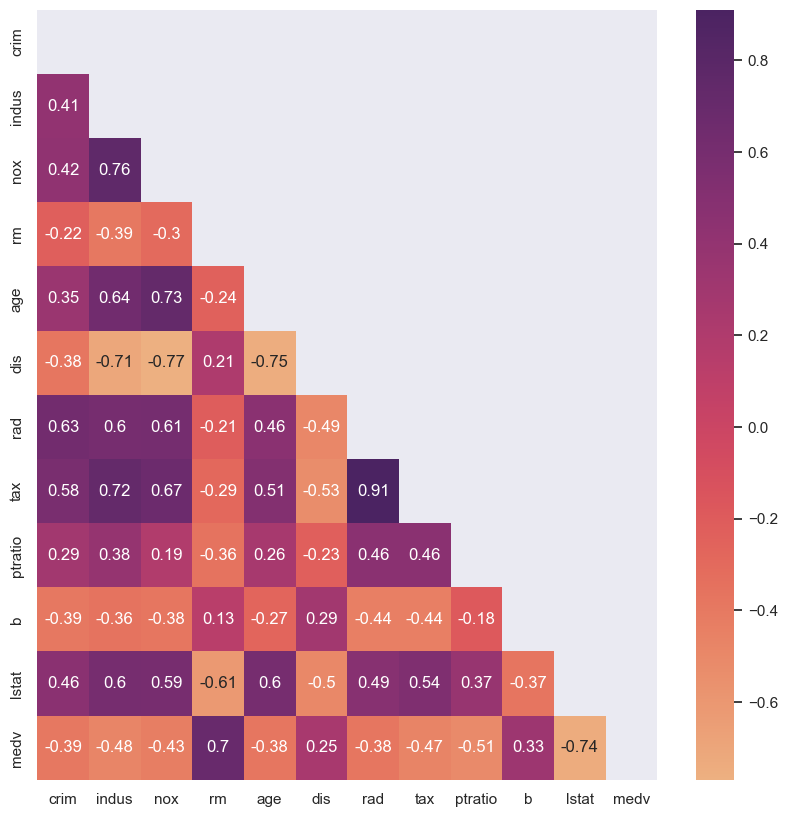

In [41]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr().round(2), cmap='flare', annot=True, mask=mask, ax=ax)

In [42]:
# drop correlated values

columns = ['tax', 'rad', 'nox', 'indus', 'dis']
df = df.drop(columns=columns)

C:\Users\Superuser\AppData\Local\Temp\ipykernel_20468\2127393514.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = df.drop('medv', 1).columns


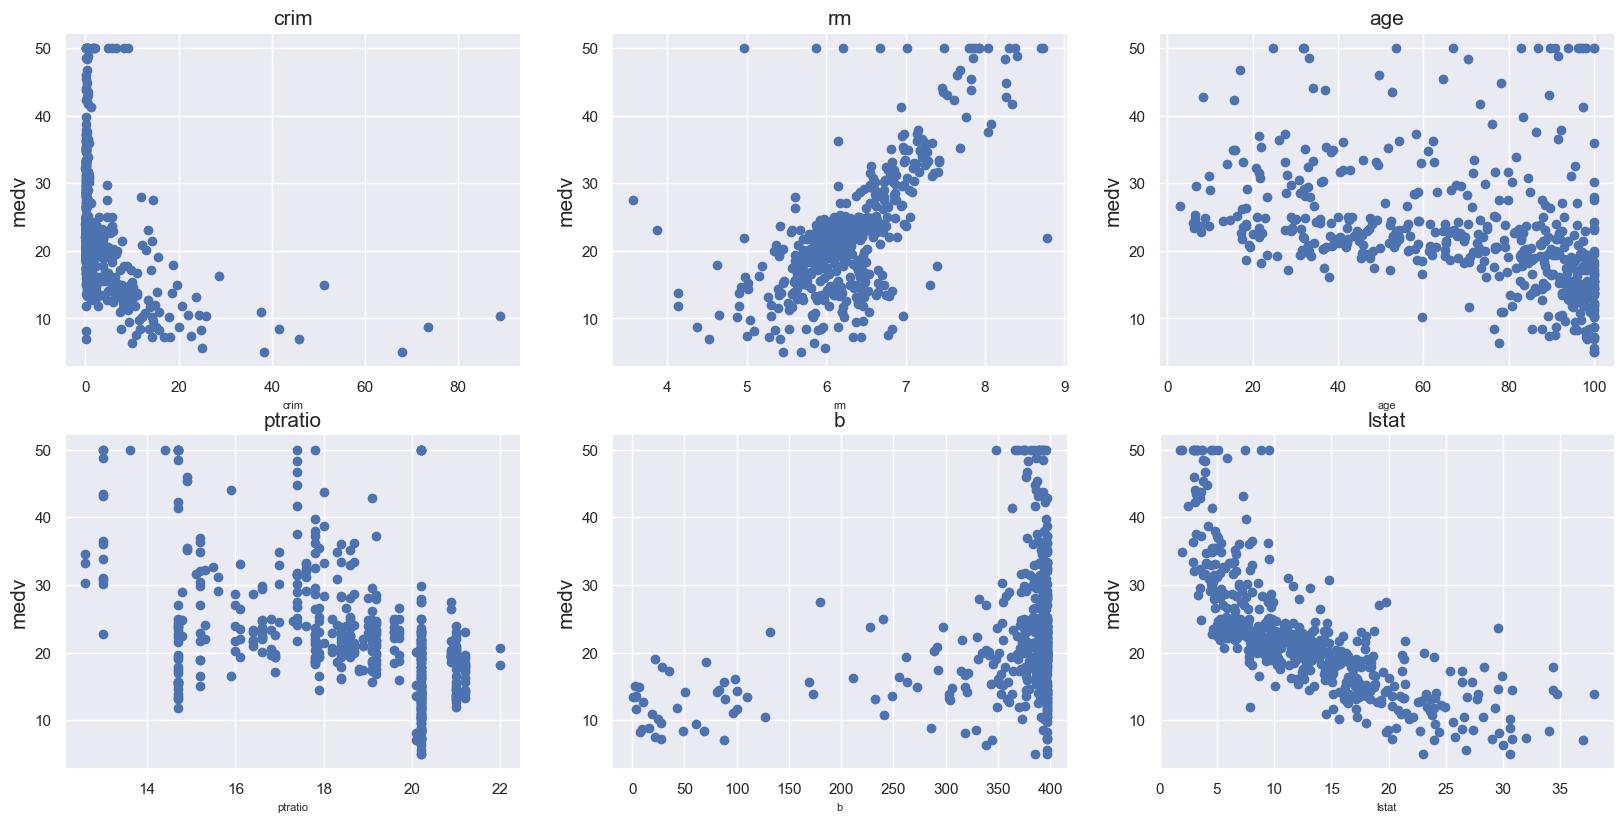

In [43]:
features = df.drop('medv', 1).columns
target = df['medv']
plt.figure(figsize=(20,20))
for index, feature_name in enumerate(features):
    plt.subplot(4, int(len(features)/2), index+1)
    plt.scatter(df[feature_name], target)
    plt.title(feature_name, fontsize=15)
    plt.xlabel(feature_name, fontsize=8)
    plt.ylabel('medv', fontsize=15)

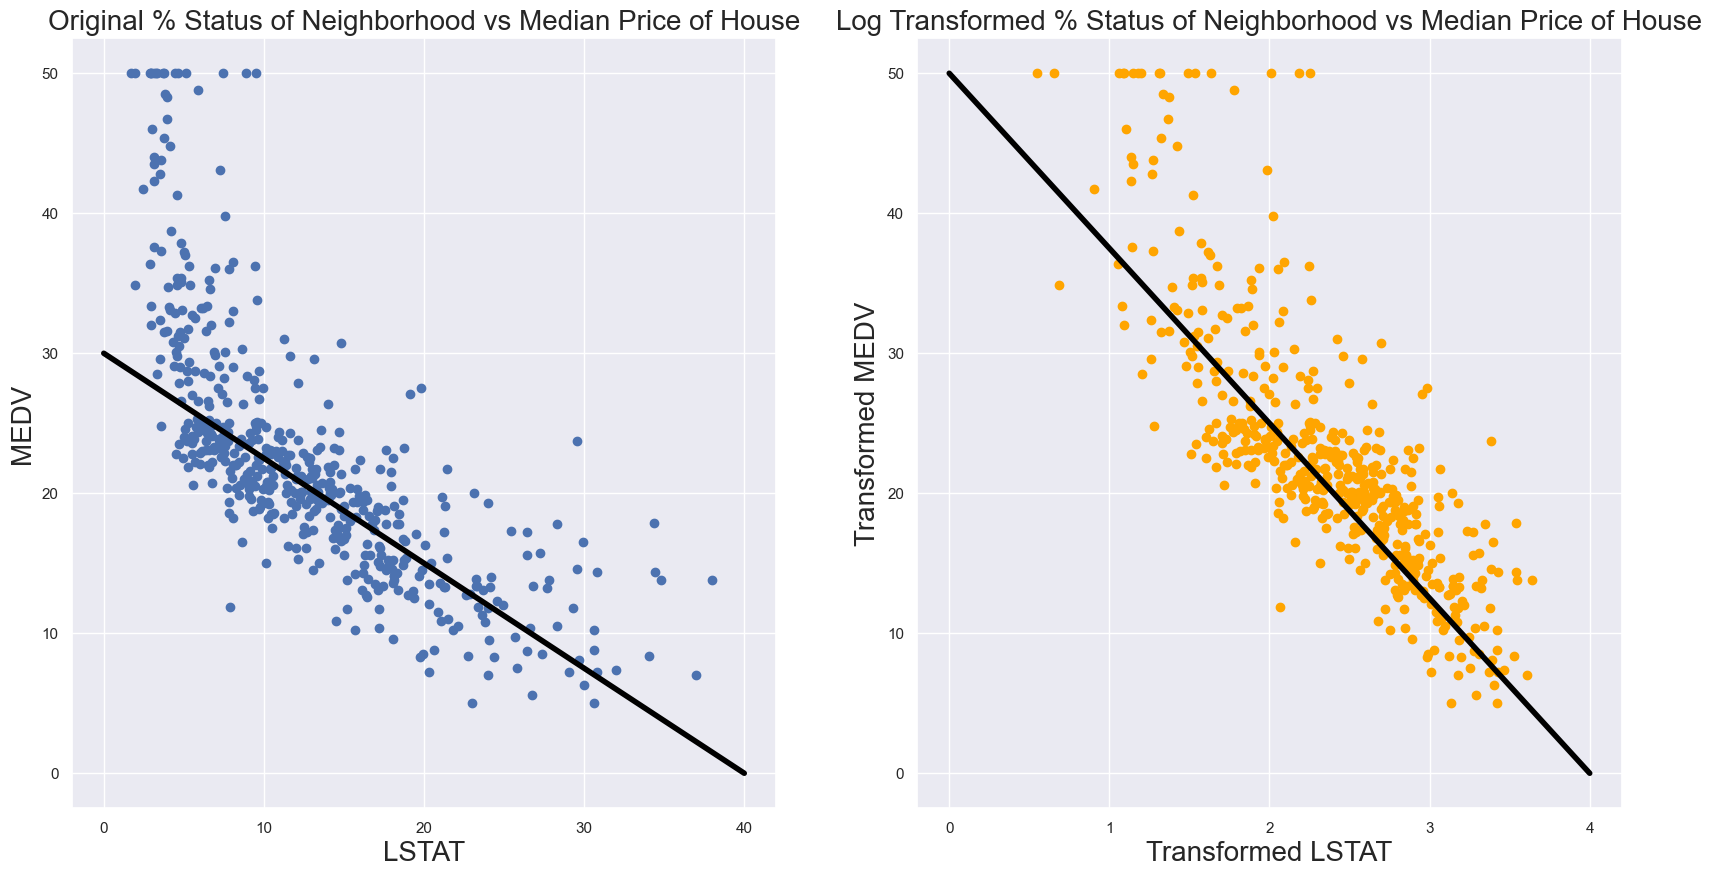

In [44]:
df["loglstat"] = df["lstat"].apply(np.log)
plt.figure(figsize=(20,10))

# showing plot 1
plt.subplot(1,2,1)
plt.scatter(df["lstat"], df['medv'])
plt.title('Original % Status of Neighborhood vs Median Price of House', fontsize= 20)
plt.xlabel('LSTAT',fontsize=20);
plt.ylabel('MEDV',fontsize=20);
plt.plot([0,40],[30,0], linewidth=4, color="black")

# showing plot 2
plt.subplot(1,2,2)
plt.scatter(df["loglstat"], df['medv'], color="orange")
plt.title('Log Transformed % Status of Neighborhood vs Median Price of House', fontsize= 20)
plt.xlabel('Transformed LSTAT',fontsize=20);
plt.ylabel('Transformed MEDV',fontsize=20);
plt.plot([0,4],[50,0], linewidth=4, color="black")


#Apply global parameters
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

plt.show()

In [45]:
X = df[['loglstat', 'rm']]
y = df["medv"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)

lrm = LinearRegression()

lrm.fit(X_train, y_train)

y_predicted = lrm.predict(X_test)

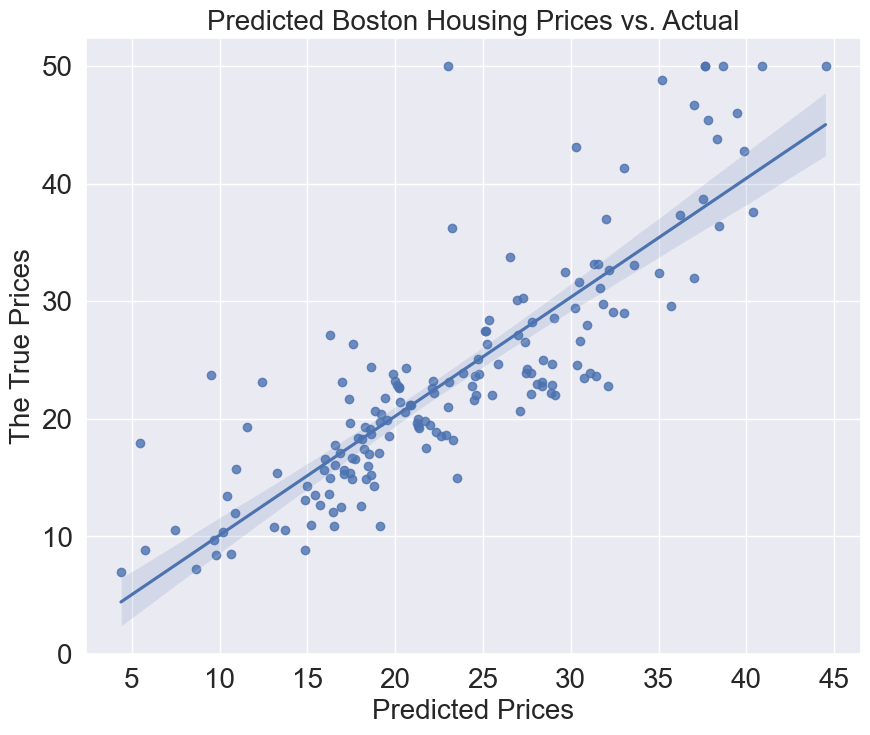

In [46]:
plt.figure(figsize=(10,8))
sns.regplot(x=y_predicted, y=y_test, data=df)
plt.axis('tight')
plt.ylabel('The True Prices', fontsize=20)

plt.xlabel('Predicted Prices', fontsize=20)
plt.title("Predicted Boston Housing Prices vs. Actual", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [49]:
root_mse = (np.sqrt(mean_squared_error(y_test, y_predicted)))
r2 = r2_score(y_test, y_predicted) # 1 - RSS/TSS

print(f"Root mean squared error: {root_mse}")
print(f"R2 Score: {r2}")

Root mean squared error: 5.214330262011093
R2 Score: 0.7155988559379332
